In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
seeds = np.arange(100)
random_state=42

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[1]]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
[X_train, X_valid, y_train, y_valid] = [pd.DataFrame(x) for x in [X_train, X_valid, y_train, y_valid]]

In [6]:
scalex = MinMaxScaler(feature_range=(-1,1))
scalex.fit(X_train)
[X_train_sc, X_valid_sc] = [pd.DataFrame(scalex.transform(x), columns=X.columns) for x in [X_train, X_valid]]

In [7]:
scaley = MinMaxScaler(feature_range=(0, 1))
scaley.fit(y_train)
[y_train_sc, y_valid_sc] = [pd.DataFrame(scaley.transform(y), columns=y.columns) for y in [y_train, y_valid]]

In [8]:
pos_idxs = []
col_above = []

In [9]:
i = 0
for seed in seeds:
    i += 1
    #print('Seed: {}'.format(seed))
    rng = np.random.default_rng(seed=seed)
    for run in range(100):
        #print('Seed: {}, run: {}'.format(seed, run))
        X_train_sc['random'] = rng.random(size=len(X_train_sc))
        perm = rng.permutation(len(X_train_sc.columns))
        X_perm = X_train_sc[X_train_sc.columns[perm]]
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
        rf.fit(X_perm, np.ravel(y_train_sc))
        feature_importances_sorted, X_col_sorted = zip(*sorted(zip(rf.feature_importances_, X_perm.columns), reverse=True))
        pos_idxs.append(X_col_sorted.index('random'))
        col_above.append(X_perm.columns[:pos_idxs[-1]])
        #col_above += [col for col in X_scaled.columns[:pos_idxs[-1]]]
    print('{}% done'.format(i*100//len(seeds)))

1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done
100% done


In [10]:
#plt.figure()
#plt.hlines(1,1, len(X_scaled.columns),colors='r')
#plt.eventplot(pos_idxs, orientation='horizontal', colors='b', alpha=0.3)
#plt.show()

In [11]:
col_names = [l for lst in col_above for l in lst ]
col_counts = Counter(col_names)

In [12]:
col_counts = {k: v/100 for k, v in sorted(col_counts.items(), key=lambda item: item[1], reverse=True)}
col_counts

{'Eig14_EA(dm)': 20.78,
 'Mor02m': 20.77,
 'SpMAD_EA(bo)': 20.76,
 'DISPe': 20.74,
 'E2m': 20.73,
 'Mor19p': 20.73,
 'MATS6p': 20.71,
 'SpMax8_Bh(i)': 20.71,
 'Mor30m': 20.71,
 'piPC05': 20.7,
 'IC1': 20.69,
 'TDB05v': 20.66,
 'F01[N-N]': 20.66,
 'SpMaxA_EA(ed)': 20.66,
 'CATS3D_05_NN': 20.64,
 'HATSs': 20.64,
 'HATS2m': 20.63,
 'Mor29e': 20.61,
 'Mor31e': 20.61,
 'Eig08_AEA(ed)': 20.6,
 'SpMAD_G/D': 20.6,
 'Eig11_AEA(ri)': 20.6,
 'SpMAD_X': 20.59,
 'TDB01s': 20.58,
 'ATSC3s': 20.58,
 'HATS6e': 20.56,
 'Mor09m': 20.55,
 'SpMaxA_EA(bo)': 20.54,
 'CATS2D_02_PL': 20.54,
 'VE2_G/D': 20.54,
 'HATS0e': 20.53,
 'TDB04p': 20.53,
 'B05[C-O]': 20.52,
 'SpMAD_EA': 20.52,
 'Eig06_AEA(bo)': 20.52,
 'nRCO': 20.52,
 'SpMax2_Bh(s)': 20.51,
 'MATS6i': 20.51,
 'P1v': 20.5,
 'RDF030m': 20.49,
 'MATS3v': 20.48,
 'R4s': 20.48,
 'F01[C-N]': 20.48,
 'Mor23m': 20.48,
 'CATS3D_03_DL': 20.48,
 'H4i': 20.47,
 'P_VSA_ppp_con': 20.47,
 'GATS2m': 20.47,
 'SM5_X': 20.47,
 'R3e': 20.47,
 'nCIR': 20.47,
 'HATS5s': 20.

In [13]:
print(col_counts['random'], list(col_counts.keys()).index('random'))

19.3 1165


In [ ]:
df = pd.DataFrame.from_dict(col_counts, orient='index')
df.plot(kind='bar')

In [ ]:
len(col_counts.keys())

In [ ]:
number_of_features = 5
selected_features = []
for key in col_counts.keys():
    if len(selected_features) == number_of_features:
        break
    selected_features.append(key)
selected_features

In [ ]:
np.save('attribute_counts_rs{}.npy'.format(random_state), col_counts)

In [8]:
rd = np.load('attribute_counts_rs{}.npy'.format(random_state), allow_pickle=True).item()

In [9]:
rd['random']

19.12

In [12]:
most_used = ['P_VSA_MR_5', 'Mor04m', 'E1p', 'Mor22s', 'LUMO / eV']
for m in most_used:
    print(m, rd[m])

P_VSA_MR_5 18.91
Mor04m 18.31
E1p 18.84
Mor22s 18.44
LUMO / eV 18.56


In [13]:
rd_sorted = {k: v for k, v in sorted(rd.items(), key=lambda item: item[1], reverse=True)[:63]}

In [14]:
rd_sorted

{'MATS6p': 20.01,
 'HATS2m': 20.0,
 'TDB04u': 19.97,
 'Eig14_EA(dm)': 19.97,
 'VE2_G/D': 19.89,
 'SIC1': 19.86,
 'RDF065m': 19.81,
 'Mor09m': 19.81,
 'CATS2D_06_PP': 19.8,
 'ChiA_G': 19.79,
 'Mor31m': 19.79,
 'N-072': 19.71,
 'IDDE': 19.67,
 'Mor02m': 19.66,
 'nHDon': 19.66,
 'CATS3D_06_DD': 19.65,
 'RDF035v': 19.63,
 'CATS3D_05_AL': 19.62,
 'TDB04i': 19.61,
 'GATS4v': 19.61,
 'piPC05': 19.6,
 'CATS2D_02_PL': 19.6,
 'GATS5v': 19.6,
 'ATSC2e': 19.59,
 'Eig13_EA(dm)': 19.58,
 'Eig06_AEA(bo)': 19.58,
 'R7e+': 19.57,
 'HATSm': 19.57,
 'VE2sign_B(e)': 19.56,
 'H0m': 19.56,
 'HGM': 19.56,
 'Ho_Dt': 19.55,
 'F05[N-O]': 19.55,
 'R6m+': 19.55,
 'Chi_RG': 19.55,
 'Mor09s': 19.55,
 'TDB01s': 19.54,
 'SM07_EA(bo)': 19.54,
 'B03[N-O]': 19.53,
 'B03[O-O]': 19.52,
 'Mor17s': 19.52,
 'HATS1e': 19.52,
 'Eig13_AEA(bo)': 19.52,
 'nOHs': 19.51,
 'CATS2D_01_LL': 19.51,
 'Mor19p': 19.51,
 'X3Av': 19.51,
 'T(N..N)': 19.51,
 'SpPosA_B(s)': 19.5,
 'RDF080e': 19.5,
 'B03[C-C]': 19.5,
 'RDF060s': 19.5,
 'R3v+': 

In [9]:
rd_df = pd.DataFrame(rd, index=[0]).T

In [10]:
rd_df.columns=['value']

In [11]:
rd_df.describe()

,value
count,1261.000000
mean,18.872300
std,0.351518
min,17.950000
25%,18.620000
50%,18.870000
75%,19.110000
max,20.010000


In [29]:
len(rd_df[rd_df['value']<18.87+0.35])

1052

In [19]:
len(rd_df)

1261

In [20]:
list(rd_sorted.keys())

['MATS6p',
 'HATS2m',
 'TDB04u',
 'Eig14_EA(dm)',
 'VE2_G/D',
 'SIC1',
 'RDF065m',
 'Mor09m',
 'CATS2D_06_PP',
 'ChiA_G',
 'Mor31m',
 'N-072',
 'IDDE',
 'Mor02m',
 'nHDon',
 'CATS3D_06_DD',
 'RDF035v',
 'CATS3D_05_AL',
 'TDB04i',
 'GATS4v',
 'piPC05',
 'CATS2D_02_PL',
 'GATS5v',
 'ATSC2e',
 'Eig13_EA(dm)',
 'Eig06_AEA(bo)',
 'R7e+',
 'HATSm',
 'VE2sign_B(e)',
 'H0m',
 'HGM',
 'Ho_Dt',
 'F05[N-O]',
 'R6m+',
 'Chi_RG',
 'Mor09s',
 'TDB01s',
 'SM07_EA(bo)',
 'B03[N-O]',
 'B03[O-O]',
 'Mor17s',
 'HATS1e',
 'Eig13_AEA(bo)',
 'nOHs',
 'CATS2D_01_LL',
 'Mor19p',
 'X3Av',
 'T(N..N)',
 'SpPosA_B(s)',
 'RDF080e',
 'B03[C-C]',
 'RDF060s',
 'R3v+',
 'AVS_B(s)',
 'CATS2D_07_AA',
 'R1u',
 'CATS2D_00_AA',
 'P_VSA_e_3',
 'Dp',
 'CATS3D_03_DL',
 'CATS2D_04_AL',
 'R1v',
 'CATS3D_05_DD']

In [21]:
all_sorted = {k: v for k, v in sorted(rd.items(), key=lambda item: item[1], reverse=True)}

In [22]:
all_sorted['Hlgap / eV']

18.62

In [23]:
all_sorted['LUMO / eV']

18.56

In [24]:
all_sorted['HOMO / eV']

18.73

In [25]:
rd_df.iloc[[63]]

,value
SpMax8_Bh(i),19.46


In [16]:
rd_df['idx'] = rd_df.index
rd_df = rd_df.reset_index()

In [17]:
rd_df

,index,value,idx
0,MATS6p,20.01,MATS6p
1,HATS2m,20.00,HATS2m
2,TDB04u,19.97,TDB04u
3,Eig14_EA(dm),19.97,Eig14_EA(dm)
4,VE2_G/D,19.89,VE2_G/D
...,...,...,...
1256,SHED_AN,18.04,SHED_AN
1257,EE_H2,18.01,EE_H2
1258,R4m,18.01,R4m
1259,JGI2,17.96,JGI2


In [18]:
rd_df[rd_df['idx']=='random']

,index,value,idx
297,random,19.12,random


In [29]:
rd_df[rd_df['idx']=='HOMO / eV']

,index,value,idx
820,HOMO / eV,18.73,HOMO / eV


In [30]:
rd_df[rd_df['idx']=='LUMO / eV']

,index,value,idx
1012,LUMO / eV,18.56,LUMO / eV


In [31]:
rd_df[rd_df['idx']=='Hlgap / eV']

,index,value,idx
946,Hlgap / eV,18.62,Hlgap / eV


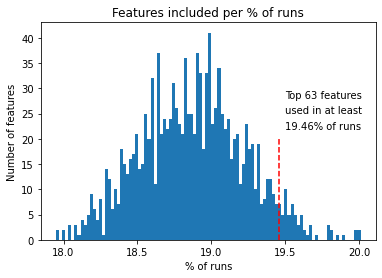

In [33]:
fig, ax = plt.subplots()
rd_df.plot.hist(bins=100, ax=ax, legend=False)
plt.xlabel('% of runs')
plt.ylabel('Number of features')
plt.title('Features included per % of runs')
ax.plot([19.46, 19.46], [0, 20], 'r--')
ax.text(19.5, 28, 'Top 63 features')
ax.text(19.5, 25, 'used in at least')
ax.text(19.5, 22, '19.46% of runs')
plt.show()